In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('casestudy.csv',index_col=0)

In [5]:
df

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [8]:
df.year.unique()

array([2015, 2016, 2017])

In [44]:
df_2015 = df[df['year']==2015]

In [10]:
df_2016 = df[df['year']==2016].merge(df[df['year']==2015],how='left',on='customer_email')

In [17]:
df_2017 = df[df['year']==2017].merge(df[df['year']==2016],how='left',on='customer_email')

In [26]:
df_2016.columns = ['customer_email','net_revenue_curr','year_curr','net_revenue_prev','year_prev']
df_2017.columns = ['customer_email','net_revenue_curr','year_curr','net_revenue_prev','year_prev']

In [65]:
def show_res(year):

    df_new = df[df['year']==year].merge(df[df['year']==year-1],how='left',on='customer_email')
    df_new.columns = ['customer_email','net_revenue_curr','year_curr','net_revenue_prev','year_prev']
   
    df_lost = df[df['year']==year-1].merge(df[df['year']==year],how='left',on='customer_email')
    df_lost.columns = ['customer_email','net_revenue_curr','year_curr','net_revenue_prev','year_prev']
    
    # Total revenue for the current year
    ttl_rev = df_new.net_revenue_curr.sum()

    # New Customer Revenue 
    new_rev = df_new[df_new.isnull().T.any()].net_revenue_curr.sum()

    # Existing Customer Growth
    exist_rev_growth = df_new[df_new.notnull().T.all()].net_revenue_curr.sum()-df_new[df_new.notnull().T.all()].net_revenue_prev.sum()

    # Revenue lost from attrition
    lost_rev = df_lost[df_lost.isnull().T.any()].net_revenue_curr.sum()

    # Existing Customer Revenue Current Year
    exist_rev_curr = df_new[df_new.notnull().T.all()].net_revenue_curr.sum()

    # Existing Customer Revenue Prior Year
    exist_rev_prev = df_new[df_new.notnull().T.all()].net_revenue_prev.sum()

    # Total Customers Current Year
    ttl_cstmr_curr = len(df[df['year']==year]['customer_email'].unique())

    # Total Customers Previous Year
    ttl_cstmr_prev = len(df[df['year']==year]['customer_email'].unique())

    # New Customers
    new_cstmr = len(df_new[df_new.isnull().T.any()])

    # Lost Customers
    lost_cstmr = len(df_lost[df_lost.isnull().T.any()])


    res = pd.DataFrame.from_dict({'total_revenue':[ttl_rev],
                                      'new_customer_revenue':[new_rev],
                                      'existing_customer_growth':[exist_rev_growth],
                                      'revenue_lost':[lost_rev],
                                      'existing_revenue_curr':[exist_rev_curr],
                                      'existing_revenue_prior':[exist_rev_prev],
                                      'total_customer_curr':[ttl_cstmr_curr],
                                      'total_customer_prior':[ttl_cstmr_prev],
                                      'new_customer':[new_cstmr],
                                      'lost_customer':[lost_cstmr]})
    return res


In [70]:
res_2016 = show_res(2016)

In [71]:
res_2017 = show_res(2017)

(array([23084., 22995., 23148., 23316., 22960., 23076., 23456., 23224.,
        22964., 23071.]),
 array([  1. ,  25.9,  50.8,  75.7, 100.6, 125.5, 150.4, 175.3, 200.2,
        225.1, 250. ]),
 <a list of 10 Patch objects>)

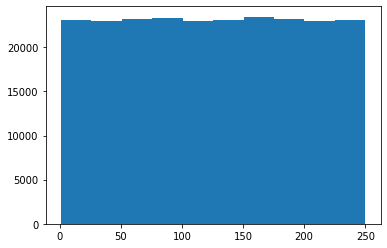

In [76]:
df_2015 = df[df['year']==2015]
plt.hist(df_2015['net_revenue'])

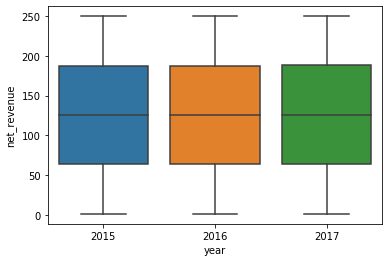

In [81]:
sns.boxplot(x='year',y='net_revenue',data = df, showfliers=False)
plt.show()

In [85]:
df[df['year']==2015]

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,peeorxpsbr@gmail.com,39.16,2015
231291,vanasezjpw@gmail.com,233.46,2015
231292,dnpremlztb@gmail.com,136.27,2015


In [87]:
[df[df['year']==2015]['net_revenue'].sum(),res_2016['total_revenue'],res_2017['total_revenue']]

[29036749.189999994, 0    25730943.59
 Name: total_revenue, dtype: float64, 0    31417495.03
 Name: total_revenue, dtype: float64]

Text(0.5, 1.0, 'total revenue')

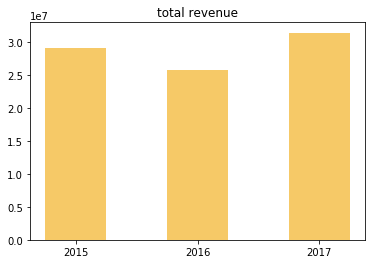

In [99]:
import random
r = random.random()
b = random.random()
g = random.random()
color=(r, g, b)

plt.bar(['2015','2016','2017'],[df[df['year']==2015]['net_revenue'].sum(),res_2016['total_revenue'],res_2017['total_revenue']],color=color,width=0.5)
plt.title('total revenue')

In [102]:
[res_2016['new_customer_revenue'],res_2017['new_customer_revenue']]

[0    18245491.01
 Name: new_customer_revenue, dtype: float64, 0    28776235.04
 Name: new_customer_revenue, dtype: float64]

Text(0.5, 1.0, 'new customer revenue')

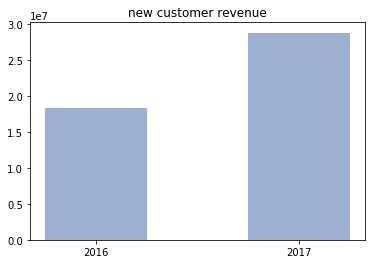

In [116]:
r = random.random()
b = random.random()
g = random.random()
color=(r, g, b)


plt.bar(['2016','2017'],[res_2016['new_customer_revenue'][0],res_2017['new_customer_revenue'][0]],color=color,width=0.5)
plt.title('new customer revenue')

Text(0.5, 1.0, 'existing customer_growth')

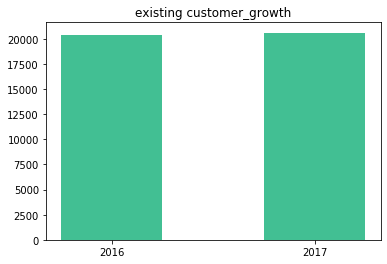

In [111]:
r = random.random()
b = random.random()
g = random.random()
color=(r, g, b)

plt.bar(['2016','2017'],[res_2016['existing_customer_growth'][0],res_2017['existing_customer_growth'][0]],color=color,width=0.5)
plt.title('existing customer_growth')